# Bike Sharing Assignment

### About this assignment

BoomBikes is a bikesharing service that has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They aspire to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Assignment begins
<hr/>

We will use python to build a multiple regression model for this assignment.

In [1]:
# Import python libraries used for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Imports from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Imports from statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Specify some default settings for the project
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 150
pd.options.display.max_colwidth = 200
sns.set_palette('viridis')
sns.set_style("whitegrid", {'axes.facecolor': '#e9f0f7', 'grid.color': 'white'})

#### This assignment is divided into nine main sections:
1. [Reading and Understanding Data](#1.-Reading-and-Understanding-Data)
2. [Data Visualization & EDA](#2.-Data-Visualization-&-EDA)
3. [Data Preparation](#3.-Data-Preparation)
4. [Splitting Data into Training and Test sets](#4.-Splitting-Data-into-Training-and-Test-sets)
5. [Building Linear Model](#5.-Building-Linear-Model)
6. [Residual Analysis of the Train data](#6.-Residual-Analysis-of-the-Train-data)
7. [Model Prediction](#7.-Model-Prediction)
8. [Model Evaluation](#8.-Model-Evaluation)
9. [Conclusion](#9.-Conclusion)

## 1. Reading and Understanding Data
<hr/>

In [2]:
# Load provided bike sharing data
df_day = pd.read_csv('day.csv')

In [3]:
# preview first few records in dataset
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_day.shape

(730, 16)

Check if dataset as any null values

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observations
- There are **730** rows and **16** columns in this dataset
- All columns numeric values but some of them seem to represent categorical values

#### Based on above observations following fields are actual numeric and categorical fields

In [8]:
# List of true numeric fields
numeric_fields = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# List of categorical fields
categorical_fields = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

### 1.2 Data Cleaning

#### Check for outliers

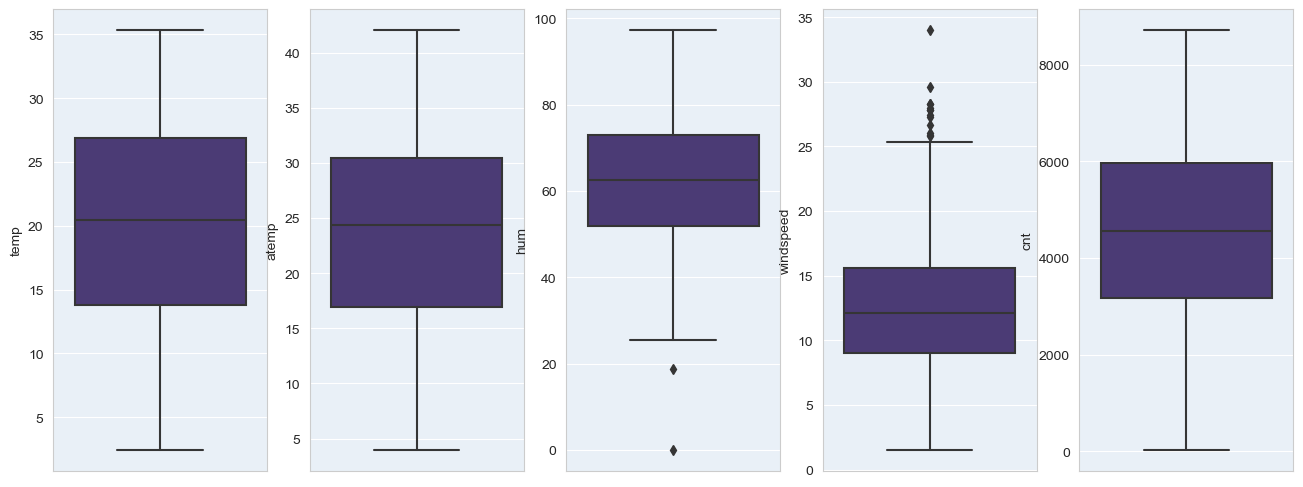

In [9]:
plt.figure(figsize=(16,6))

index = 1
for col in numeric_fields:
    plt.subplot(1,5,index)
    sns.boxplot(y=col, data=df_day)
    index+=1
plt.show()

*Majority of variables have no significant outliers. We will not drop any records.*

#### Check for duplicate rows

In [10]:
# Check for duplicate rows
df_day[df_day.duplicated()].shape

(0, 16)

*No duplicates found*

#### 3.2 Map categorical columns to readable values

In [11]:
df_day.season = df_day.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df_day.mnth = df_day.mnth.apply(lambda x: calendar.month_name[x])
df_day.yr = df_day.yr.map({0:'2018', 1:'2019'})
df_day.weekday = df_day.weekday.apply(lambda x: calendar.day_name[x])
df_day.weathersit = df_day.weathersit.map({1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'})

In [12]:
# Preview transformed data
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,January,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,January,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2. Data Visualization & EDA
<hr/>

In this section, we visualize and analyze the data through exploratory data analysis (*EDA*) using those visualizations.

Define some utility functions that we will be used on this section

In [13]:
def show_pairplot(df, fields):
    sns.pairplot(df[fields])
    plt.show()
    
def show_boxplots(df, x_fields, y_field):
    n_rows = int(np.ceil(len(x_fields) / 2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows*4))
    axes = axes.flatten()
    for i, field in enumerate(x_fields):
        ax = axes[i] 
        sns.boxplot(x=field, y=y_field,data=df, ax=ax)
        # Rotate tick if space is congested
        if len(ax.get_xticklabels()) > 5:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(field)
        ax.set_xlabel('') 

    plt.tight_layout()
    plt.show()
    
# Plots a histogram and boxplot for univariate analysis of a numeric field
def plot_univariate_numeric(df, field1, field2, bins):
     # Create subplots and adjust the sizes
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'top': 0.88})
    # Plot a histogram with specified number of bins allocated
    sns.histplot(data=df, x=field1, bins=bins, kde=True, element="bars", ax=ax1)
    ax1.set_xlabel(f"Histogram of {field1}")
    if len(ax1.get_xticklabels()) > 5:
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    # Plot boxplot for specified fields
    sns.boxplot(df, x=field2, y=field1)
    ax2.set_xlabel(f"Boxplot of {field1} comparision of {field2}")
    if len(ax2.get_xticklabels()) > 5:
            ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    title = fig.suptitle(f'Univariate analysis of "{field1}" field', fontsize=14, fontweight='bold', ha='center')
    title.set_y(0.93)
    # Adjust the padding between and around subplots.   
    plt.tight_layout()
    fig.show()
    
# Creates a pivot table and plots histogram for bivariate analsysis
def plot_bivariate_heatmap(df, field1, field2, field3, ax = None):
    # Generate grouped data based on two categorical fields and mean of third numeric field
    grouped_data = df.groupby([field1, field2])[field3].mean().reset_index()
    pivot_table = grouped_data.pivot(index=field1, columns=field2, values=field3)
    # Plot a heatmap
    sns.heatmap(pivot_table, annot=True, cmap='crest', fmt='.2f', cbar_kws={'label': field3}, ax=ax)
    plt.xlabel(field2)
    plt.ylabel(field1)
    # If subplot set title to subplot otherwise set title to main figure then show it
    if ax:
        ax.set_title(f'Impact of {field3} and {field2} on {field1}')
    else:
        plt.title(f'Impact of {field3} and {field2} on {field1}')
        plt.show()
    
# Plots plot_bivariate_heatmap for multiple index variables and stacks on two column rows
def plot_bivariate_heatmap_multiple(df, index, columns, values):
    num_plots = len(values)
    num_rows = int(np.ceil(num_plots / 2))
    # Create subplots and adjust sizes
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    axes = axes.flatten()
    # Loop through each index and plot histogram for it
    for i, value in enumerate(values):
        ax = axes[i] 
        # Plot a heatmap
        plot_bivariate_heatmap(df, index, columns, value, ax=ax)
    # Adjust the padding between and around subplots. 
    plt.tight_layout()
    fig.show()

### 2.1 Visualize numeric fields using pairplot

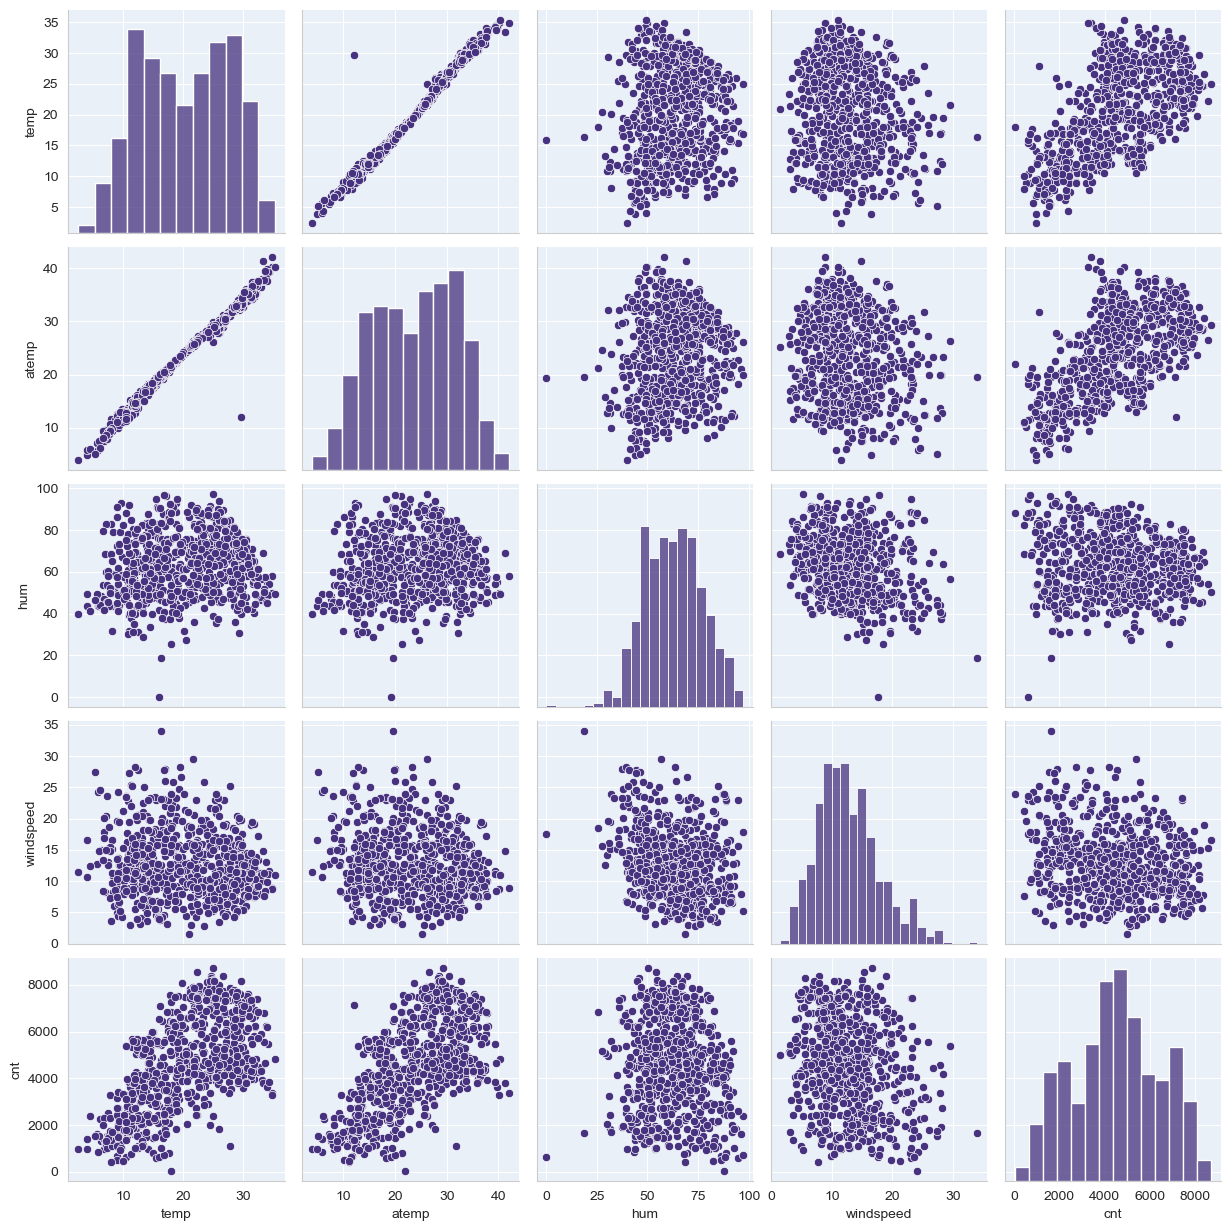

In [14]:
show_pairplot(df_day, numeric_fields)

#### Observations:

- Strongly linear relationship between **temp** and **atemp**. These two fields seem highly correlated.
- Linear relationship between  **temp**, **atemp** and **cnt** 

### 2.2 Visualize categorical fields using boxplots

We will utilize boxplots to examine the impact of categorical fields on the variable "cnt".

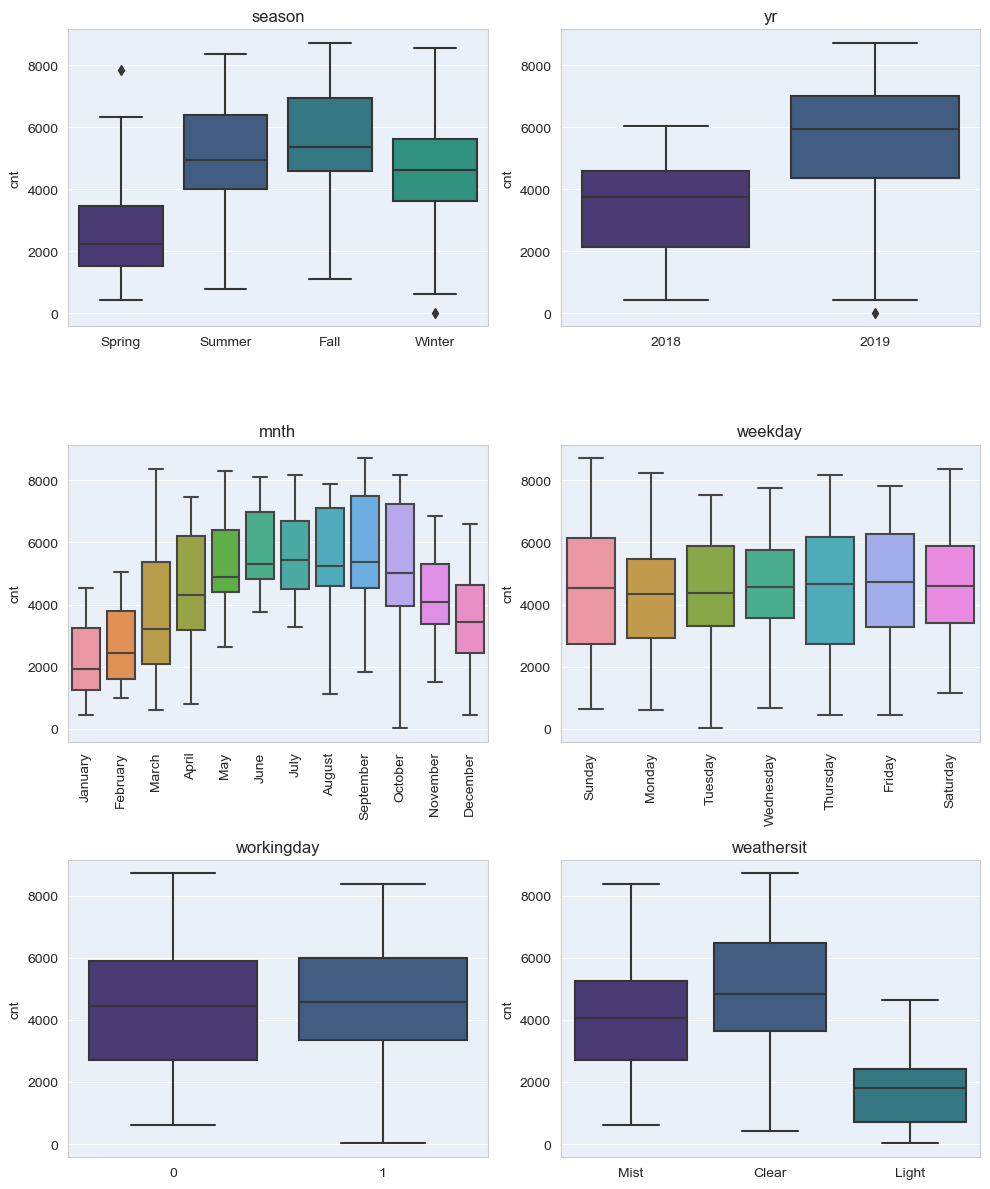

In [15]:
# Temporarily map yr to 2018 * 2019
show_boxplots(df_day, categorical_fields, 'cnt')

### 2.3 Univariate analysis of temp

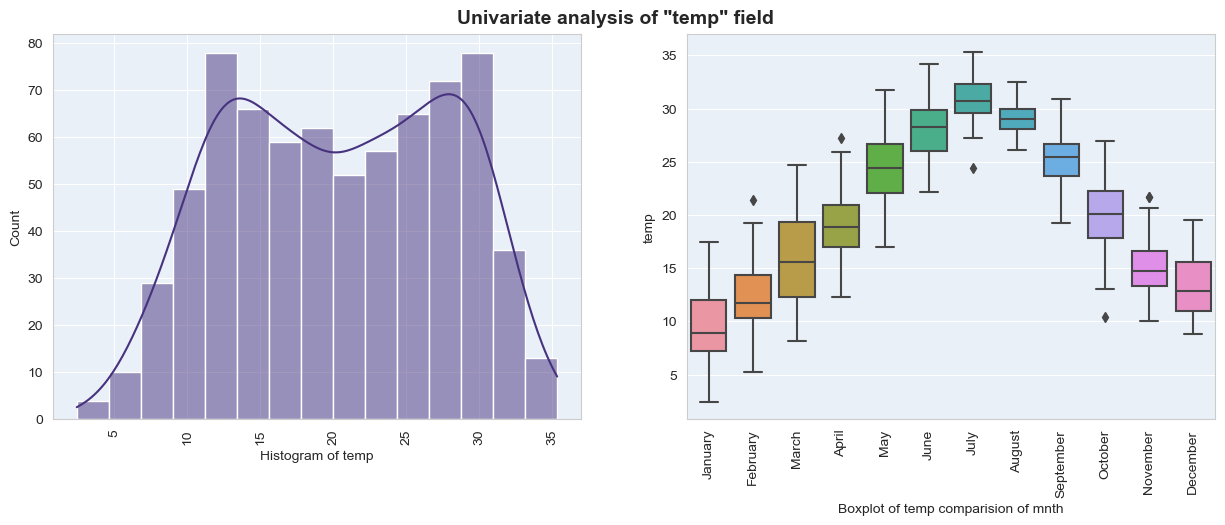

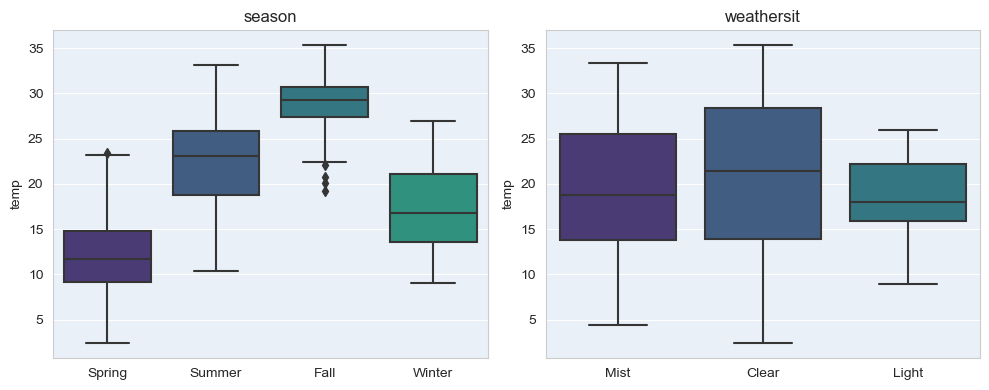

In [16]:
plot_univariate_numeric(df_day, 'temp', 'mnth', 15)
show_boxplots(df_day, ['season', 'weathersit'], 'temp')

### 2.3 Bivariate analysis using temp and hum against cnt over all four seasons

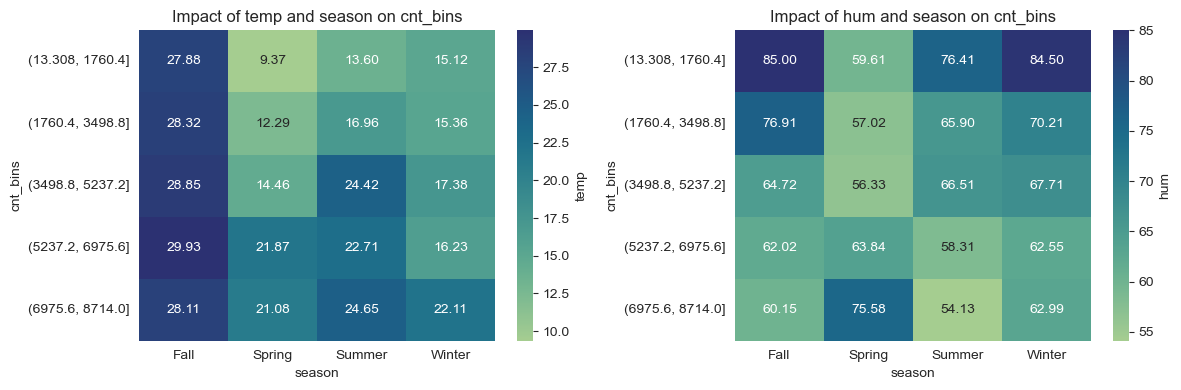

In [17]:
df_day_1 = df_day.copy()
df_day_1['cnt_bins'] = pd.cut(df_day_1['cnt'], bins=5)
plot_bivariate_heatmap_multiple(df_day_1, 'cnt_bins', 'season', ['temp', 'hum'])

#### Observations:

Value for **cnt** fields exhibits the following behaviors:
- Is higher around Summer and Fall and lower in Spring and Winter
- Is higher in year 2019 compared to 2018
- Is higher in June to November months compared to other months
- Is higher on Sundays
- Is higher during holidays
- Is higher during clear days

Some additional observations:
- **temp** seems to be strongly correlated with mnth, season
- **cnt** generally increases in all seasons as **temp** increase
- **cnt** might either increase or decrease with increase in **hum** depending on the season (i.e. correlation of cnt and hum are changing directions during different seasons).

## 3. Data Preparation
<hr/>

Define some utility functions that we will be used on this section

In [18]:
# Drops given columns in-place and prints some relevant information
def drop_columns(df, cols):
    print("Shape of dataframe before dropping columns:", df.shape)
    # Drop specified columns
    df.drop(cols, axis = 1, inplace=True)
    print("Shape of dataframe after dropping columns:", df.shape)
    print("Specified columns have been dropped!")

### 3.1 Drop columns that won't be used

According to the data dictionary.
- **instant** is an index field
- **dteday** is date significant portion of which is represented by yr, mnth fields
- **casual** is count of casual users (already included in cnt)
- **registered** count of registered users (already included in cnt)

Due to nature of these fields, they are not useful for this predicting target field. We will drop these four fields.

In [19]:
# Drop columns that won't be used
drop_columns(df_day, ['instant', 'dteday', 'casual', 'registered'])

Shape of dataframe before dropping columns: (730, 16)
Shape of dataframe after dropping columns: (730, 12)
Specified columns have been dropped!


In [20]:
print (f'Remaining columns: \n{list(df_day.columns)}')

Remaining columns: 
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


### 3.2 Create dummy variables

Create a utility function that generates dummy variables for categorical variables in a DataFrame and provide following additional features:
- Drops preferred dummy variables when specified.
- Drops the first dummy variable for categorical columns where a preferred dummy variable is not provided.

In [21]:
# Adds dummy variables to dataframe for provided columns 
def get_dummies(df, columns, drop_dummies={}):    
    # Get dummies and drop first when preferred dummy (to drop) isn't provided
    columns_1 = [x for x in columns if not x in drop_dummies]
    df = pd.get_dummies(df, columns=columns_1, drop_first=True)

    # Get dummies and drop preferred dummy if provided
    columns_2 = [x for x in columns if x in drop_dummies]
    df = pd.get_dummies(df, columns=columns_2, drop_first=False)
    dummies_to_drop = [f'{column}_{drop_dummies.get(column)}' for column in columns_2]
    df = df.drop(dummies_to_drop, axis=1)
    
    return df

#### Create dummmies categorical variables in the dataframe. 

*When creating dummy variables, we can drop first or alternatively we can aim to drop the least important categorical values to influence the demand for shared bikes*

In [22]:
# Note: we mapped yr to 2018 and 2019 but workingday is still already binary 0 or 1
# Hence we do not need to create dummy variable for workingday
columns = [x for x in categorical_fields if x != 'workingday'] 
# df_data = get_dummies(df_day, columns, drop_dummies={'season': 'Winter'})

df_data = pd.get_dummies(df_day, columns=columns, drop_first=True)

In [23]:
# Preview the created dummy variables and their assigned data
df_data.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light,weathersit_Mist
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 4. Splitting Data into Training and Test sets
<hr/>

### 4.1 Split the data into a 70% training set and a 30% test set.

In [24]:
np.random.seed(0)
# Use train_size of 0.7 (i.e. 70%) and test_size of 0.3 or (i.e. 30%)
df_train, df_test = train_test_split(df_data, train_size = 0.7, random_state = 100)

### 4.2 Rescaling the Features

Apply MinMaxScaler to scale numeric fields between 0 and 1.

In [25]:
scaler = MinMaxScaler()
df_train[numeric_fields] = scaler.fit_transform(df_train[numeric_fields])

# Preview the scaled values
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light,weathersit_Mist
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            510 non-null    int64  
 1   workingday         510 non-null    int64  
 2   temp               510 non-null    float64
 3   atemp              510 non-null    float64
 4   hum                510 non-null    float64
 5   windspeed          510 non-null    float64
 6   cnt                510 non-null    float64
 7   season_Spring      510 non-null    uint8  
 8   season_Summer      510 non-null    uint8  
 9   season_Winter      510 non-null    uint8  
 10  yr_2019            510 non-null    uint8  
 11  mnth_August        510 non-null    uint8  
 12  mnth_December      510 non-null    uint8  
 13  mnth_February      510 non-null    uint8  
 14  mnth_January       510 non-null    uint8  
 15  mnth_July          510 non-null    uint8  
 16  mnth_June          510 n

In [27]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Use headmap to see overall correlation between all scaled fields

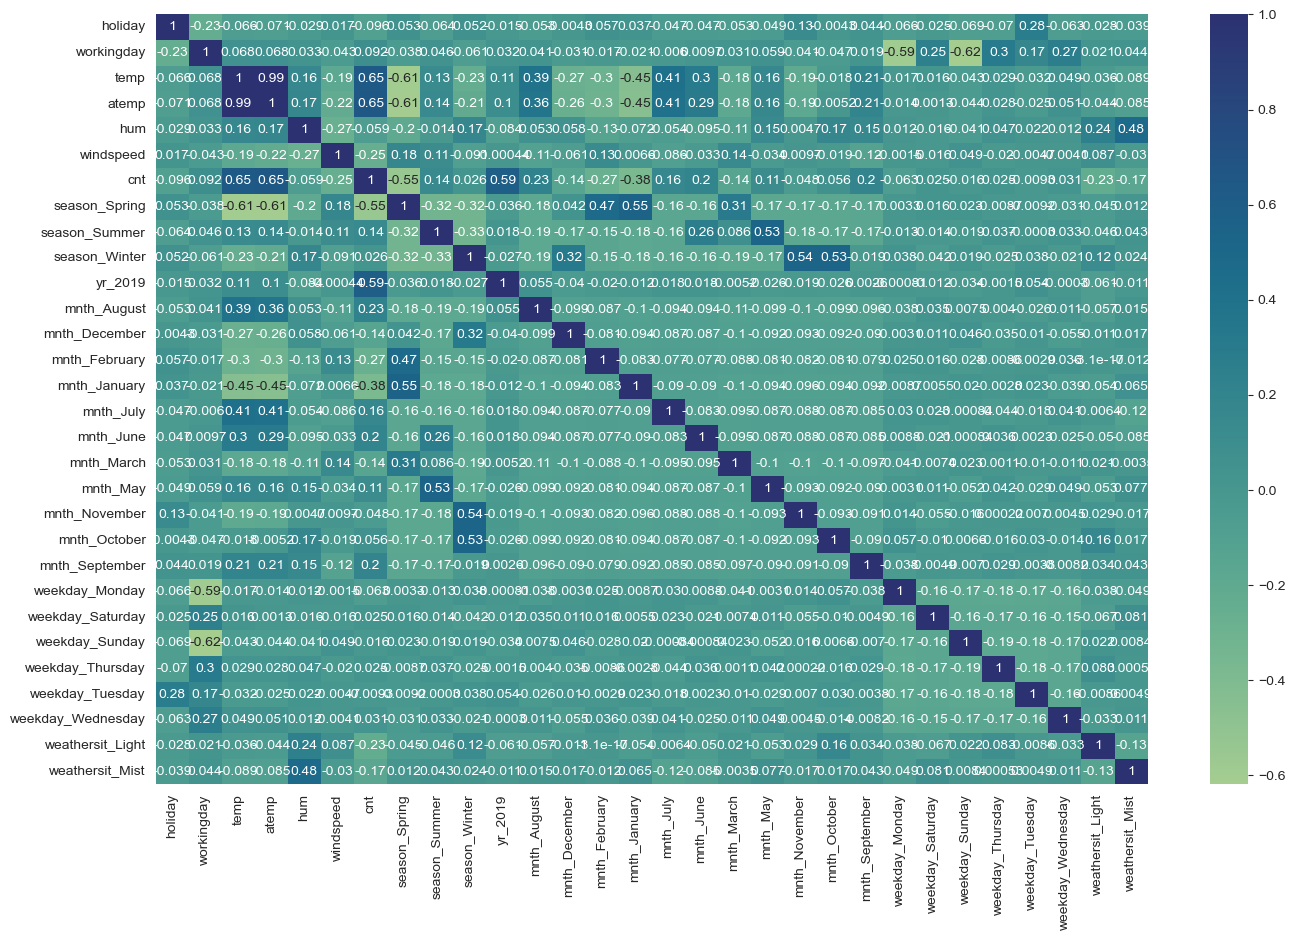

In [28]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="crest")
plt.show()

#### Define X and y variables for the training set

In [29]:
# Drop target variable and assign remaining variables to X_train
X_train = df_train.drop('cnt', axis=1)

# Assign target variable to y_train
y_train = df_train['cnt']

## 5. Building Linear Model
<hr/>

Define some utility functions that we will be used on this section

In [30]:
# Build a OLS model and drop specified columns before fitting the data
def build_model(X, y, columns_to_drop=[]):
    # Add constant if it doesn't already exist
    X_sm = sm.add_constant(X, has_constant='skip')
    lm = sm.OLS(y, X_sm).fit()
    return X_sm, lm

# Calculate variance inflation factor
def get_vif(X):
    X = X.drop(['const'], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Run recursive feature elimination algorithm
def get_rfe(n_features, X, y):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    rfe = RFE(estimator=lm, n_features_to_select=n_features)
    rfe.fit(X, y)
    return rfe

# Return df with list of columns, rfe ranking and rfe support status
def describe_rfe_result(rfe, column_names, show_selected):
    rfe_result = pd.DataFrame()
    rfe_result['Features'] = column_names
    rfe_result['Rank'] = rfe.ranking_
    rfe_result['Selected'] = rfe.support_
    rfe_result = rfe_result[rfe_result['Selected'] == show_selected]
    rfe_result = rfe_result.sort_values(by = "Rank", ascending = True)
    return rfe_result

### 5.1 Recursive Feature Elimination

Start by applying Recursive Feature Elimination (RFE) to select the top 15 most important features from the dataset.

In [31]:
# Top 15 features to be selected using RFE
rfe = get_rfe(15, X_train, y_train)

#### Features to be selected based on RFE

In [32]:
describe_rfe_result(rfe, X_train.columns, True)

,Features,Rank,Selected
0,holiday,1,True
1,workingday,1,True
2,temp,1,True
4,hum,1,True
5,windspeed,1,True
6,season_Spring,1,True
7,season_Summer,1,True
8,season_Winter,1,True
9,yr_2019,1,True
13,mnth_January,1,True


#### Features to be eliminated based on RFE

In [33]:
describe_rfe_result(rfe, X_train.columns, False)

,Features,Rank,Selected
18,mnth_November,2,False
11,mnth_December,3,False
12,mnth_February,4,False
3,atemp,5,False
21,weekday_Monday,6,False
17,mnth_May,7,False
26,weekday_Wednesday,8,False
25,weekday_Tuesday,9,False
10,mnth_August,10,False
22,weekday_Saturday,11,False


###  5.2 Building Models

Build first model using RFE-recommended features, assess p-values, VIF values, and consider business understanding to further simplify the model.

#### Model 1

Since the features identified by RFE for elimination do not appear to include any clearly important fields for this domain, we will proceed to drop those features from the model.

##### Dropping features identified by RFE  and creating the first Model

In [34]:
drop_columns(X_train, X_train.columns[~rfe.support_])

Shape of dataframe before dropping columns: (510, 29)
Shape of dataframe after dropping columns: (510, 15)
Specified columns have been dropped!


In [35]:
X_train, lm1 = build_model(X_train, y_train)
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          4.22e-191
Time:                        16:59:46   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.036  

##### Since all p-values for the features are below 0.05, we will proceed to examine the VIF for each feature.

In [36]:
# Calculate VIF for all remaining features
get_vif(X_train)

,Features,VIF
3,hum,29.37
2,temp,17.78
1,workingday,5.31
4,windspeed,4.73
5,season_Spring,4.53
7,season_Winter,3.46
6,season_Summer,2.85
14,weathersit_Mist,2.29
8,yr_2019,2.09
12,weekday_Sunday,1.98


#### Model 2

##### Drop "hum" due to its high VIF compared to other features.

In [37]:
drop_columns(X_train, ['hum'])
X_train, lm2 = build_model(X_train, y_train)
print(lm2.summary())

Shape of dataframe before dropping columns: (510, 16)
Shape of dataframe after dropping columns: (510, 15)
Specified columns have been dropped!
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.60e-188
Time:                        16:59:46   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      

##### Since all p-values for the features are below 0.05, we will proceed to examine the VIF for each feature.

In [38]:
# Calculate VIF for all remaining features
get_vif(X_train)

,Features,VIF
2,temp,7.07
1,workingday,5.24
3,windspeed,4.68
4,season_Spring,3.07
5,season_Summer,2.34
7,yr_2019,2.08
6,season_Winter,1.98
11,weekday_Sunday,1.97
8,mnth_January,1.62
9,mnth_July,1.59


Now the variable **temp** has the highest Variance Inflation Factor (VIF). Although in theory we should be dropping **temp** it is essential to consider domain knowledge, which suggests that **temp** could be a crucial feature for the model.

#### Model 3 
Next, we will **temporarily remove temp** and evaluate the resulting model.

In [39]:
X_train_copy = X_train.copy()
drop_columns(X_train_copy, ['temp'])
X_train_copy, lm3 = build_model(X_train_copy, y_train)
print(lm3.summary())

Shape of dataframe before dropping columns: (510, 15)
Shape of dataframe after dropping columns: (510, 14)
Specified columns have been dropped!
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          6.44e-154
Time:                        16:59:46   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      

**Note:** Excluding **temp** from the model leads to a substantial drop in both R-squared and Adjusted R-squared. Hence, we will discard **Model 3** retain **temp** as one of the features in our model.

##### Continuing on from Model 2, since all p-values for the features are below 0.05, we will proceed to examine the VIF for each feature.

In [40]:
# Calculate VIF for all remaining features
get_vif(X_train)

,Features,VIF
2,temp,7.07
1,workingday,5.24
3,windspeed,4.68
4,season_Spring,3.07
5,season_Summer,2.34
7,yr_2019,2.08
6,season_Winter,1.98
11,weekday_Sunday,1.97
8,mnth_January,1.62
9,mnth_July,1.59


#### Model 4 

As previously stated, we will retain **temp** and proceed to drop **workingday**, which has the second-highest VIF.

In [41]:
drop_columns(X_train, ['workingday'])
X_train, lm4 = build_model(X_train, y_train)
print(lm4.summary())

Shape of dataframe before dropping columns: (510, 15)
Shape of dataframe after dropping columns: (510, 14)
Specified columns have been dropped!
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          2.48e-186
Time:                        16:59:46   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      

#### Model 5 

##### We will drop "weekday_Sunday" due to the high p-value.

In [42]:
drop_columns(X_train, ['weekday_Sunday'])
X_train, lm5 = build_model(X_train, y_train)
print(lm5.summary())
get_vif(X_train)

Shape of dataframe before dropping columns: (510, 14)
Shape of dataframe after dropping columns: (510, 13)
Specified columns have been dropped!
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          8.14e-187
Time:                        16:59:46   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      

,Features,VIF
1,temp,5.13
2,windspeed,4.62
3,season_Spring,2.75
4,season_Summer,2.24
6,yr_2019,2.07
5,season_Winter,1.78
7,mnth_January,1.61
8,mnth_July,1.59
11,weathersit_Mist,1.56
9,mnth_September,1.34


##### Thoughts on Model 5

At this point, this model is looking pretty good. However the VIF value for **temp** is still above 5 and there are still too many features in this model. To simply the model further, we will access the effect of dropping **windspeed** from the model as it has the second highest VIF.

#### Model 6 

##### Drop "windspeed" and access effects of doing that.

In [43]:
drop_columns(X_train, ['windspeed'])
X_train, lm6 = build_model(X_train, y_train)
print(lm6.summary())
get_vif(X_train)

Shape of dataframe before dropping columns: (510, 13)
Shape of dataframe after dropping columns: (510, 12)
Specified columns have been dropped!
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          3.83e-180
Time:                        16:59:46   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      

,Features,VIF
1,temp,4.28
5,yr_2019,2.07
2,season_Spring,1.99
3,season_Summer,1.94
6,mnth_January,1.60
7,mnth_July,1.59
4,season_Winter,1.57
10,weathersit_Mist,1.56
8,mnth_September,1.34
9,weathersit_Light,1.07


##### Thoughts on Model 6

VIF for **temp** has now dropped before 5 after removing **windspeed** from this model. R-Squared and Adjusted R-Squared values are still high so we will accept this change.

Also, on a separate experiment it was observed that keeping **windspeed** in the model drops the Adjusted R-Squared value for the **test set** significantly below Adjusted R-Squared value for **training set** which indicates removing **windspeed** actually improves the quality of the model and is justified.

#### Model 7 

##### Drop "mnth_January" due to its high p-value.

In [44]:
drop_columns(X_train, ['mnth_January'])
X_train, lm7 = build_model(X_train, y_train)
print(lm7.summary())
get_vif(X_train)

Shape of dataframe before dropping columns: (510, 12)
Shape of dataframe after dropping columns: (510, 11)
Specified columns have been dropped!
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          5.71e-181
Time:                        16:59:46   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      

,Features,VIF
1,temp,4.22
5,yr_2019,2.06
3,season_Summer,1.94
6,mnth_July,1.58
4,season_Winter,1.57
9,weathersit_Mist,1.55
2,season_Spring,1.40
7,mnth_September,1.34
8,weathersit_Light,1.07
0,holiday,1.04


##### Thoughts on Model 7

- The p-value for all features are below our threshold of 0.05
- VIF for all features are below 5
- Both R-Squared and Adjusted R-Squared and above 80%
- F-statistic is large and Prob (F-statistic) is very low

This suggests that **Model 7** is a good fit for the data. We will proceed by selecting **Model 7** as the final model.

#### End of Model Building

##### Choose lm7 as the final model.

In [45]:
lm_final = lm7

## 6. Residual Analysis of the Train data
<hr/>

To assess the normal distribution assumption of the linear regression model, we will analyze residuals on the training data by comparing the actual and predicted target values.

Define some utility functions for remaining sections

In [148]:
# Calculate mean_squared_error and return rounded value
def get_mean_squared_error(y, y_pred): 
    return round(mean_squared_error(y, y_pred), 3)

# Calculate r-squared value and return rounded value
def get_r2(y, y_pred):
    return round(r2_score(y, y_pred), 3)

# Calculate adjusted-r-squared value
def get_adjusted_r2(X, y, y_pred):
    # Forumla for adjusted-r-squared value is 1 - (1 - R2) * ((n - 1)/(n - p - 1)).
    # R2 is r-squared value
    # n is number of observations
    # p is number of predictors
    r2 = r2_score(y, y_pred)
    
    # Get number of observations and number of predictors from the dataset
    n = X.shape[0]
    p = X.shape[1]

    # Use the formula
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return round(adjusted_r2, 3)

# Prints Mean Squared Error, R-Squared and Adjusted-Squared values
def print_scores_summary(X, y, y_pred):
    mse = get_mean_squared_error(y, y_pred)
    r2 = get_r2(y, y_pred)
    adjusted_r2 = get_adjusted_r2(X, y, y_pred)
    print('Mean_Squared_Error :' ,mse)
    print('R-Squared value:',r2)
    print('Adjusted R-Squared value:',adjusted_r2)
    
# Plot distribution of residuals
def plot_residuals_distribution(y, y_pred):
    # Plot the histogram of the error terms
    residuals = y - y_pred
    sns.displot(residuals, bins = 20, kde=True)
    plt.xlabel('Errors', fontsize = 12)
    plt.title('Distribution of Errors')
    plt.show()
    
# Plot qq plot of residuals
def plot_residuals_qq(y, y_pred):
    residuals = y - y_pred
    # Plot the qq-plot of residuals
    sm.qqplot(residuals, line='s')
    plt.show()
    
# Plot spread of residuals
def plot_pred_vs_residuals(y, y_pred):
    # Plot scatterplot of predicted against residuals to test
    residuals = y - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('y-pred', fontsize=12)
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted values')
    plt.show()
    
# Plot line plot for comparision of actual vs predicted values
def plot_pred_vs_actual_line(X, y, y_pred):
    plt.figure(figsize=(15, 6))
    c = [i for i in range(0,len(X),1)]
    plt.plot(c,y, color="purple")
    plt.plot(c,y_pred, color="green")
    plt.suptitle('Actual vs Predicted', fontsize = 15)
    plt.xlabel('Index')
    plt.ylabel('Count')
    plt.show()                     
   
# Plot regplot of test vs pred values
def plot_pred_vs_actual_regplot(y_test, y_pred, title):
    sns.regplot(x=y_test, y=y_pred, line_kws={'color':'red'}, scatter_kws={'color':'green'})
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    # Display the plot
    plt.show()

In [47]:
X_train.head()

,const,holiday,temp,season_Spring,season_Summer,season_Winter,yr_2019,mnth_July,mnth_September,weathersit_Light,weathersit_Mist
576,1.0,0,0.815169,0,0,0,1,1,0,0,0
426,1.0,0,0.442393,1,0,0,1,0,0,0,1
728,1.0,0,0.245101,1,0,0,1,0,0,0,0
482,1.0,0,0.395666,0,1,0,1,0,0,0,1
111,1.0,0,0.345824,0,1,0,0,0,0,0,1


#### 6.1 Predict on training data using the final model

In [48]:
y_train_pred = lm_final.predict(X_train)

#### 6.2 Inspect the normality of error terms
Plot residuals using dist plot to view the distribution

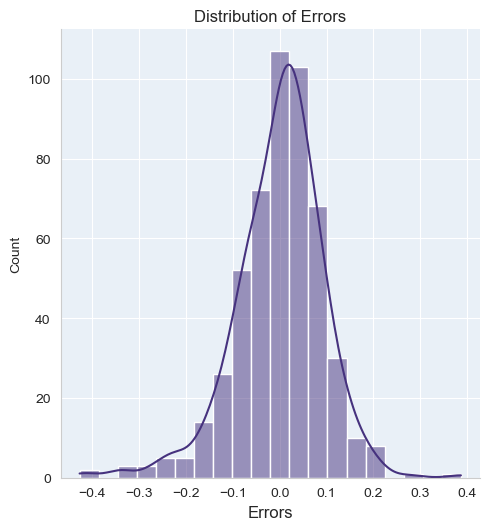

In [136]:
# Plot the histogram of the error terms
plot_residuals_distribution(y_train, y_train_pred)

*Residuals are distributed normally*

#### 6.3 Inspect q-q plot of errors

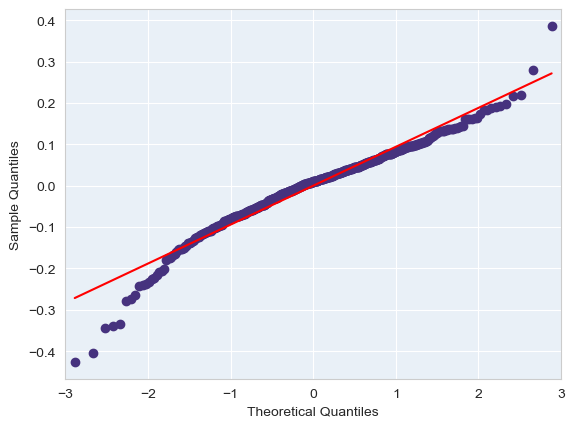

In [137]:
plot_residuals_qq(y_train, y_train_pred)

*Roughly straight qq plot indicating errors are distributed normally*

#### 6.4 Inspect independence of error terms
We use scatter plot of predicted values vs residuals and analyse the independence of the error terms.

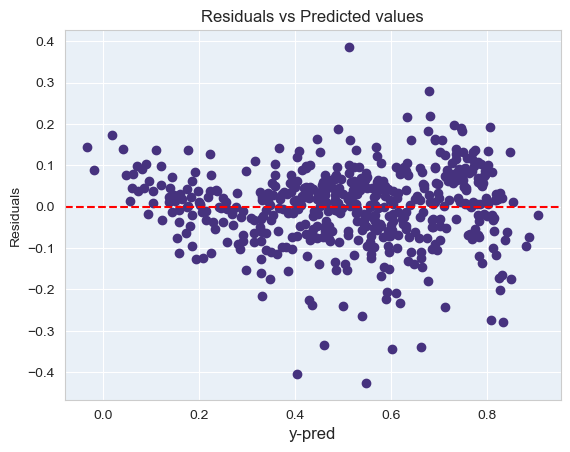

In [138]:
plot_pred_vs_residuals(y_train, y_train_pred)

*No discernable pattern seem to be exhibited. The residuals appear to spread uniformly along the x-axis which is an indication of homoscedasticiy.*

#### 6.5  Inspect homoscedasticity of error terms
We can use scatter plot of predicted values vs residuals and analyse the homoscedasticity of the error terms (same scatter plot as above). We can also plot predicted vs actual values and check how well the values hug the regression line.

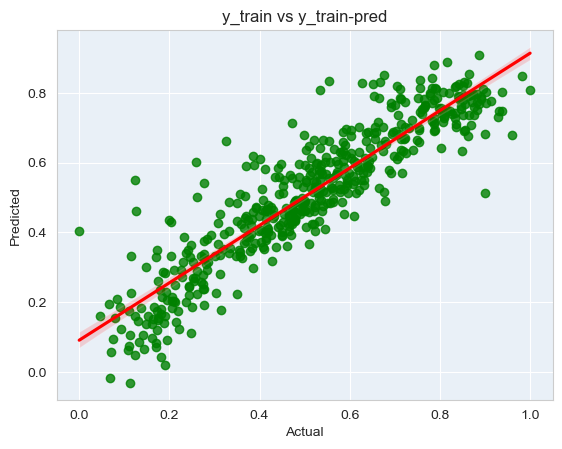

In [150]:
plot_pred_vs_actual_regplot(y_train,y_train_pred, "y_train vs y_train-pred")

*Plot doesn't seem to have obvious pattern*

#### 6.5 Actual vs Predicted line chart

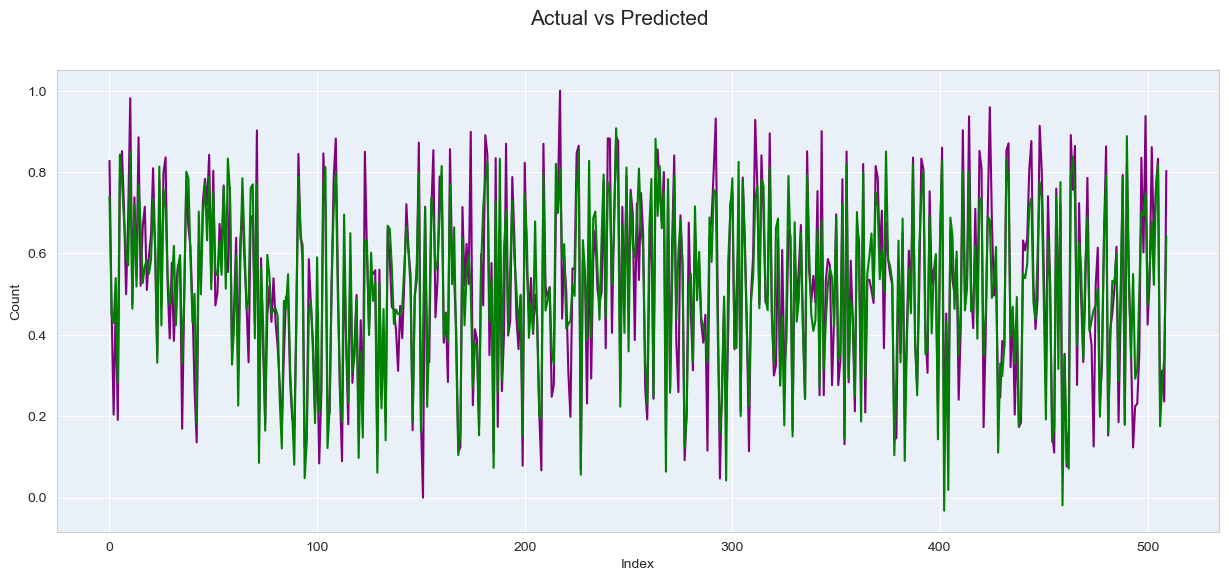

In [149]:
# Actual vs Predicted line chart
plot_pred_vs_actual_line(X_train, y_train, y_train_pred)

*Actual and Predicted values follow similar pattern*

#### 6.5 Scores summary using train dataset (Mean Square Error, R2, Adjusted R2) 

In [53]:
# Print Mean-squared-error, R2 and Adjusted R2 for train set
print_scores_summary(X_train, y_train, y_train_pred)

Mean_Squared_Error : 0.009
R-Squared value: 0.824
Adjusted R-Squared value: 0.82


## 7. Model Prediction
<hr/>

As we have fitted the model and checked the normality of error terms. We will proceed with predicting on test data using the final model.

#### 7.1 Preparing test dataset

##### Scale the test data using MinMax scaler instance that was created previously from training dataset

In [54]:
# Scale test data
df_test[numeric_fields] = scaler.transform(df_test[numeric_fields])

##### Organize the test data set into predictor (X) & target (y) variables

In [55]:
# Define X and y variables for the test data
X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']

##### Select same columns as the training set and add constant

In [56]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns[~(X_train.columns == 'const')]]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#### 7.1 Predict on test data using the final model

In [57]:
y_test_pred = lm_final.predict(X_test_new)

## 8. Model Evaluation
<hr/>

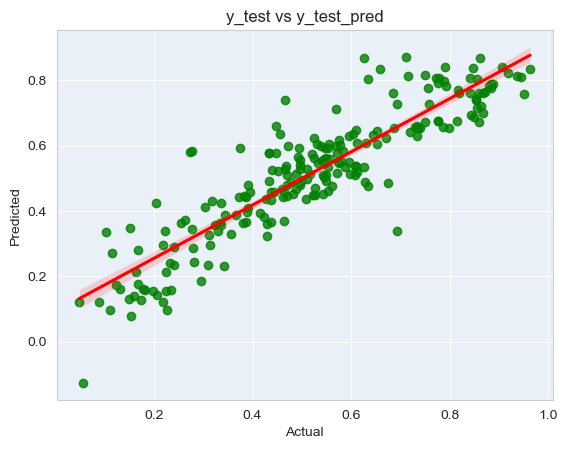

In [151]:
# Plotting y_test and y_pred and also show the regression line.
plot_pred_vs_actual_regplot(y_test,y_test_pred, 'y_test vs y_test_pred')

*Regression line seem to explain the target variables reasonably well*

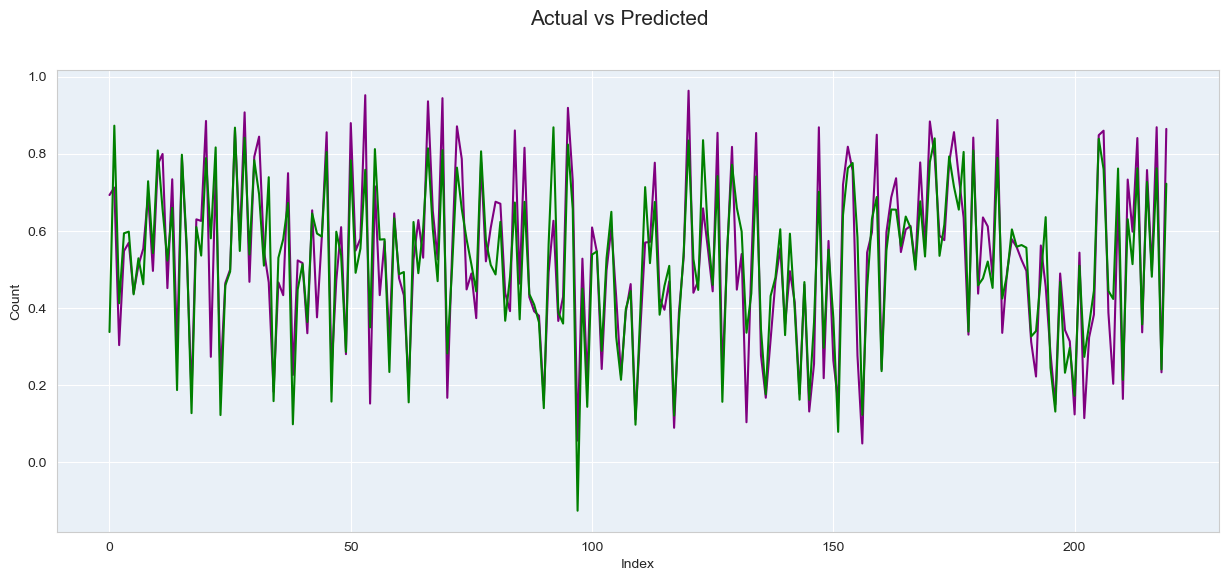

In [152]:
# Actual vs Predicted line chart
plot_pred_vs_actual_line(X_test, y_test, y_test_pred)

*Line plots of test and test_pred values plotted at each X trace similar pattern

In [60]:
# Print Mean-squared-error, R2 and Adjusted R2 for the test set
print_scores_summary(X_test, y_test, y_test_pred)

Mean_Squared_Error : 0.009
R-Squared value: 0.809
Adjusted R-Squared value: 0.78


In [61]:
#Train set

# Print Mean-squared-error, R2 and Adjusted R2 for train set
print_scores_summary(X_train, y_train, y_train_pred)

Mean_Squared_Error : 0.009
R-Squared value: 0.824
Adjusted R-Squared value: 0.82


##### Compare R-Squared and Adjusted R-Squared values from train and test sets

In [62]:
r2_train = get_r2(y_train, y_train_pred)
adjusted_r2_train = get_adjusted_r2(X_train, y_train, y_train_pred)

r2_test = get_r2(y_test, y_test_pred)
adjusted_r2_test = get_adjusted_r2(X_test, y_test, y_test_pred)

print(f"Difference R2: {round(r2_train-r2_test, 3)*100}")
print(f"Difference Adjusted-R2: {round(adjusted_r2_train-adjusted_r2_test, 3)*100}")

Difference R2: 1.5
Difference Adjusted-R2: 4.0


##### Observations
- Difference between R-Squared values of train and test data is **1.5** percentage units
- Difference between Adjusted R-Squared values of train and test data is **4.0** percentage units

This indicates the model not only has good fit with training data but also is able to predict test data very well.

## 9. Conclusion
<hr/>


We have completed generating a good quality model by carrying out linear regression on the given data. Next, we will analyze the parameters that make of our model and try to answer the original two questions of this assignment.

In [66]:
# Function that generates a linear equation from the model parameters
def generate_linear_equation(lm):
    # Get the const
    const = lm.params['const']
    # Get the list of coefficients
    coefficients = lm.params[~(lm.params.index == 'const')]
    
    # Generate the equation using the list of coefficients and const
    linear_equation = ""
    for index, value in coefficients.items():
        linear_equation += f"{round(value, 3)} * {index} + "
    linear_equation += f"{round(const, 3)}"
    return linear_equation

# Function that prints the model parameters sorted by most important feature to the least
def print_parameters(lm):
    sorted_params = sorted(lm.params.items(), key=lambda x: abs(x[1]), reverse=True)
    for index, value in sorted_params:
        print(f"{index}: {round(value, 3)}")

#### Linear equation that represents the final model

In [64]:
linear_equation = generate_linear_equation(lm_final)
print(linear_equation)

-0.1 * holiday + 0.503 * temp + -0.077 * season_Spring + 0.037 * season_Summer + 0.083 * season_Winter + 0.233 * yr_2019 + -0.052 * mnth_July + 0.081 * mnth_September + -0.299 * weathersit_Light + -0.078 * weathersit_Mist + 0.15


#### View parameters of the the final model

In [65]:
print_parameters(lm_final)

temp: 0.503
weathersit_Light: -0.299
yr_2019: 0.233
const: 0.15
holiday: -0.1
season_Winter: 0.083
mnth_September: 0.081
weathersit_Mist: -0.078
season_Spring: -0.077
mnth_July: -0.052
season_Summer: 0.037


#### Final Thoughts
We aim to answer the following question by creating a linear regression model from the dataset.

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

According to the final model we have choosen these questions can be answered as following:

- Temperature is **strongly positively correlated** with demand
- Light weathersit is **mostly negatively correlated** with demand
- Year 2019 has **higher demand** compared to year 2018
- Holiday is **gently negatively correlated**  with demand
- Winter, Summer and month of September is **somewhat positively correlated** with demand
- Mist weathersit **somewhat negatively correlated** with demand
- Clear weathersit is correlated with demand
- Spring and July month is **somewhat negatively** correlated with demand